In [1]:
import pandas as pd

#### Import CSV

In [2]:
df = pd.read_csv('data/training.csv', index_col=0)
#df['team_strength'] = df['team_points'] * (df['strength']/100)

In [3]:
df.year.value_counts()

2020    543
2019    530
2017    506
2018    490
2021    487
2016    383
Name: year, dtype: int64

#### Get X & Y

In [4]:

X = df.drop(columns=['rider', 'team', 'key', 'target', 'year'])
X.fillna(0, inplace=True)
y = df.target

In [5]:
X.head()

,age,race,team_points,best-classic-riders,top-gc-riders,top-sprinters,top-time-trial-riders,profile_type,profile_score,profile_vert,scorito,strength,finished
1073,0.0,0,1486.0,14.0,0.0,0.0,0.0,2.952381,138.190476,2478.047619,66.0,36.0,0.916667
320,0.0,0,2364.0,83.0,0.0,0.0,54.0,2.952381,134.285714,2570.619048,0.0,53.0,0.818182
460,0.0,0,1603.0,0.0,0.0,38.0,0.0,2.952381,134.285714,2570.619048,66.0,32.0,0.818182
448,0.0,0,1765.0,10.0,0.0,0.0,0.0,2.952381,134.285714,2570.619048,0.0,33.0,0.818182
1677,0.0,0,1654.0,0.0,193.0,0.0,22.0,2.809524,153.809524,2261.761905,138.0,75.0,0.714286


In [13]:
X.isnull().sum()

age                      0
team_points              0
best-classic-riders      0
top-gc-riders            0
top-sprinters            0
top-time-trial-riders    0
profile_type             0
profile_score            0
profile_vert             0
scorito                  0
strength                 0
finished                 0
dtype: int64

In [14]:
X_year = df.drop(columns=['rider', 'team', 'key', 'target']).fillna(0)
X_train = X_year[X_year['year']!=2021].drop(columns='year')
X_test = X_year[X_year['year']==2021].drop(columns='year')
y_year = df[['year', 'target']]
y_train = y_year[y_year['year']!=2021].drop(columns='year')
y_test = y_year[y_year['year']==2021].drop(columns='year')

#### Check na

In [15]:
corr = X.corr()
corr

,age,team_points,best-classic-riders,top-gc-riders,top-sprinters,top-time-trial-riders,profile_type,profile_score,profile_vert,scorito,strength,finished
age,1.000000,0.040574,0.072090,-0.034940,-0.079501,-0.002566,-0.040316,0.085066,0.011335,0.001007,0.006071,0.631276
team_points,0.040574,1.000000,0.151833,0.221839,0.057008,0.068614,0.340108,-0.462032,-0.147412,0.124635,-0.080637,0.055173
best-classic-riders,0.072090,0.151833,1.000000,0.198326,0.609911,-0.028056,0.036229,-0.059669,0.016565,0.182265,0.007661,0.078680
top-gc-riders,-0.034940,0.221839,0.198326,1.000000,-0.046630,0.290569,0.029261,-0.027056,0.035174,0.315724,-0.031648,0.042491
top-sprinters,-0.079501,0.057008,0.609911,-0.046630,1.000000,-0.074447,0.007433,-0.058360,-0.008576,0.156655,-0.006828,-0.079514
top-time-trial-riders,-0.002566,0.068614,-0.028056,0.290569,-0.074447,1.000000,-0.013543,0.003559,0.081886,0.210517,-0.005966,-0.061217
profile_type,-0.040316,0.340108,0.036229,0.029261,0.007433,-0.013543,1.000000,-0.744882,0.121583,-0.007050,0.228467,0.065113
profile_score,0.085066,-0.462032,-0.059669,-0.027056,-0.058360,0.003559,-0.744882,1.000000,-0.135332,-0.022542,0.142283,0.070343
profile_vert,0.011335,-0.147412,0.016565,0.035174,-0.008576,0.081886,0.121583,-0.135332,1.000000,-0.013778,0.265170,0.156984
scorito,0.001007,0.124635,0.182265,0.315724,0.156655,0.210517,-0.007050,-0.022542,-0.013778,1.000000,-0.047981,0.118541


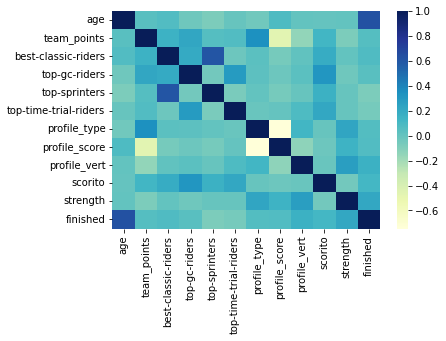

In [16]:
import seaborn as sns
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu");

<AxesSubplot:>

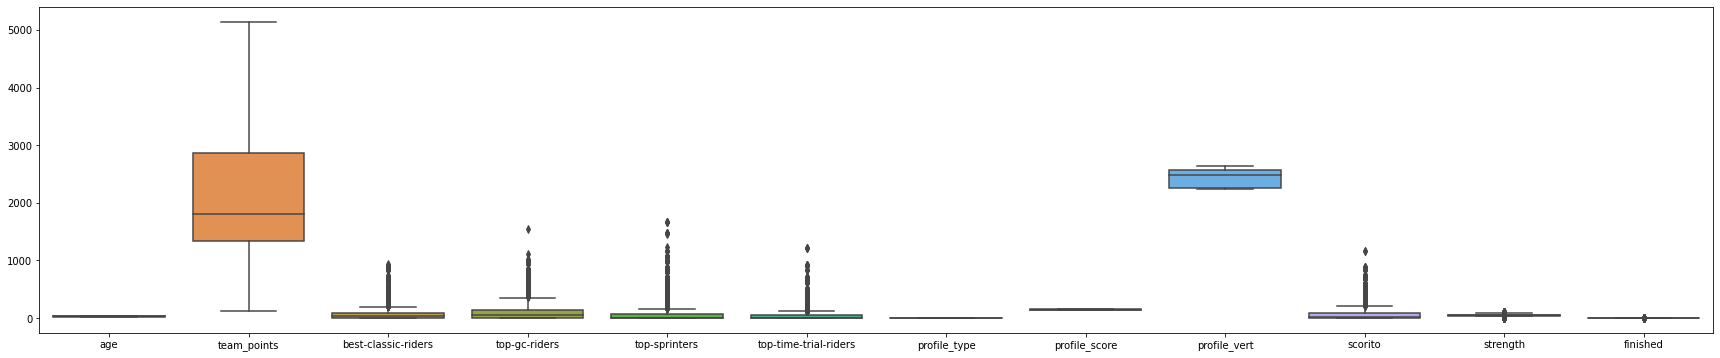

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30,6))
sns.boxplot(data=X)

In [18]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_train_scaled = scaler.fit_transform(X_train)

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


for model in [ Ridge(), LinearRegression(), Lasso(alpha=0.1), KNeighborsRegressor(), SVR(), XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1), GradientBoostingRegressor(), AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),
    n_estimators=100)]:
    m = model
    cv_results = cross_validate(m, X_scaled, y, cv=5, scoring='max_error')
    print(f"{str(model)} - {cv_results['test_score'].mean()}")

Ridge() - -794.9188586142639
LinearRegression() - -794.1954425669667
Lasso(alpha=0.1) - -797.1566752069393
KNeighborsRegressor() - -832.5599999999998
SVR() - -903.1808755476129
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...) - -907.2728851318359
GradientBoostingRegressor() - -865.8061935835467
AdaBoostRegressor(base_est

In [20]:
y_train['target']

666     42.0
530     42.0
213     42.0
285      0.0
291     42.0
       ...  
895     22.0
896      0.0
912     71.0
916    104.0
920     28.0
Name: target, Length: 1873, dtype: float64

In [48]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVR
# Instanciate model
model = AdaBoostRegressor(DecisionTreeRegressor())

# Hyperparameter search space
search_space = {
    #'alpha': stats.uniform(0.01, 1000)
    'kernel': ['rbf'],
    'C': stats.uniform(20, 40),
    'degree': stats.randint(1,10),
    'epsilon': stats.uniform(50, 65)
}

parameters={'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[2,5,10],
              'base_estimator__'
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}



# Instanciate Random Search
search = GridSearchCV(
    model, parameters,
    n_jobs=-1, scoring='max_error', cv=5, verbose=2)

# fit it
search = search.fit(X_train_scaled, y_train['target'])


# show best model
best_svc = search.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END base_estimator__max

In [49]:
search.best_score_

-686.4663701671084

In [52]:
X_test_scaled = scaler.fit_transform(X_test)
search.score(X_test_scaled, y_test)

-949.018691588785

In [53]:
# YOUR CODE HERE
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning(X,y):

    train_sizes = [25,50,75,100,250,500,750,1000,1150, 1500]

    train_sizes, train_scores, test_scores = learning_curve(search, X, y, train_sizes=train_sizes, cv=3)

    plt.figure(figsize=(20,6))
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='test scores')
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='train scores')
    plt.legend()
    plt.title('Learning Curves')
    plt.show()

In [54]:
plot_learning(X_scaled,y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END base_estimator__max

KeyboardInterrupt: 

In [ ]:
perm_df

,feature,importance
3,top-gc-riders,0.11816
4,top-sprinters,0.065315
1,team_points,0.036459
7,profile_score,0.036459
9,scorito,0.033623
5,top-time-trial-riders,0.031955
2,best-classic-riders,0.030797
8,profile_vert,0.015047
6,profile_type,0.012929
10,strength,0.011859
